# Question 4 
Consider the attached file dataset3.txt. The first two columns of the data file show the feature of each sample and the last column illustrates its corresponding binary level. (25)
a) What is the cost function in logistic regression?



b) Estimate the parameters using stochastic gradient descent (SGD) method. You need to  implement the SGD function for the optimization.
f1 and f2 are features, probability = 1/ (1 + e^(-(theta[0] + f1*theta[1] + f2*theta[2])))  inputdata = [f0 f1 f2]

feature1    feature2       class
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


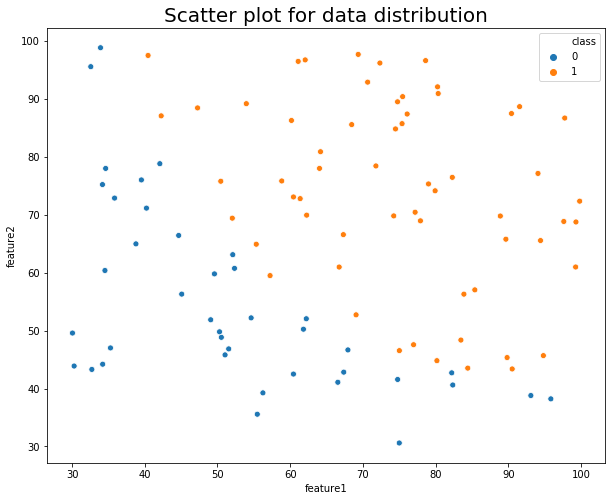

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
#e) Plot the data and show the class of the sample using different colors.
colnames = ['feature1', 'feature2', 'class']
data = pd.read_csv('./dataset3.txt', names=colnames, header=None)
plt.figure(figsize=(10,8))
lm = sns.scatterplot(x="feature1",  data= data, y="feature2", hue="class")
lm.set_title("Scatter plot for data distribution", fontsize=20)
plt.savefig('q4_data_sp.jpg')
print(data.describe())
#x_var =  np.arange(0,100)
#y_var =  -(theta[0] + theta[2]*x_var)*(1/theta[1])
#plt.plot(x_var, y_var)
#plt.show()

(100, 1) (100, 1) (100, 1)
(100, 3)
(3, 1)
(100, 1)


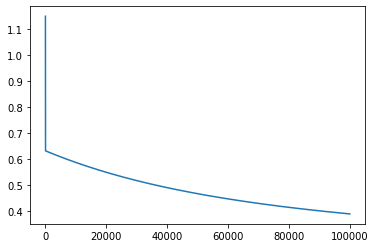

[0.94909236] [0.14656262]
9
Accuracy is : 91.0


In [2]:
def sigmoid(x):
    '''
    function used to calculate the probabilities of class 
    '''
    return  1/(1 + np.exp(-(x)))

def y_predicted(input_data, theta):
    '''
    This function claculates the probablity of the class 
    '''
    #print(np.dot(input_data, theta))
    return  sigmoid(np.dot(input_data, theta))

def cost_function(theta, x, y, y_dash):
    '''
    This function computes the cost function y_predicted(x, theta)
    '''
    N = len(x)
    cost = -(1/N)*np.sum(y*np.log(y_dash) + (1-y)*np.log(1- y_dash))
    return cost

def gradient(theta, x, y, y_dash):
    '''
    the gradient of the cost function at the point theta
    '''
    N = x.shape[0]
    diff_prob = y_dash - y
    delta_grad = (1/N)*(np.dot(diff_prob.T, x))
    #print("````",delta_grad)
    return delta_grad.T

def sgd_optimize(alpha, theta, n_iter, x, y):
    '''
    '''
    epocs = range(n_iter)
    costs = []
    for i in epocs:
        y_dash = y_predicted(x, theta)
        cost = cost_function(theta, x, y, y_dash)
        delta_theta = gradient(theta, x, y, y_dash)
        theta = theta - alpha * delta_theta
        costs.append(cost)
        #new_cost = cost_function(theta, x, y)
        #print("Epoc = "+str(i)+"; Theta = "+str(theta)+"; Cost = "+str(cost))
    return costs, epocs, theta

def accuracy(y, y_dash):
    #print(y_dash)
    print(max(y_dash), min(y_dash))
    y_dash = y_dash > 0.5
    y_dash = y_dash.astype(int)
    diff = abs(y - y_dash)
    predicted = np.sum(diff)
    print(predicted)
    accuracy = (1 - predicted/len(y)) * 100
    print("Accuracy is : "+str(accuracy))


N = len(data)
f0 = np.ones((N,1))
f1 = data["feature1"].to_numpy()
#print(type(f1), type(f0))
f1 = f1.reshape(f1.shape[0],-1)
f2 = data["feature2"].to_numpy()
f2 = f2.reshape(f2.shape[0],-1)
print(f1.shape, f2.shape, f0.shape)

#regularize data:
#f1 = (f1 - np.mean(f1)) / (np.max(f1) - np.min(f1))
#f2 = (f2 - np.mean(f2)) / (np.max(f2) - np.min(f2))

feature = np.hstack((f0, f1, f2))
print (feature.shape)
theta = np.random.random((3,1)) * 0.1
#theta = np.zeros((3,1))
#print(theta)
print(theta.shape)
y = data["class"].to_numpy()
y = y.reshape(y.shape[0], -1)
print (y.shape)

costs, epocs, theta = sgd_optimize(.001, theta, 100000, feature, y)
plt.plot(epocs, costs)
plt.show()

y_dash = y_predicted(feature, theta)
accu = accuracy(y, y_dash)

feature1    feature2       class
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


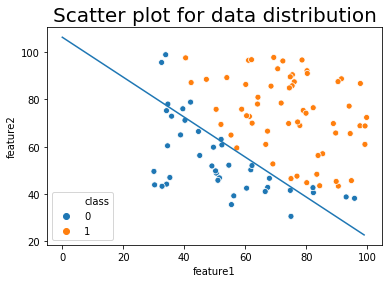

In [3]:
sns.scatterplot(x="feature1",  data= data, y="feature2", hue="class").set_title("Scatter plot for data distribution", fontsize=20)

print(data.describe())
x_var =  np.arange(0,100)
y_var =  -(theta[0] + theta[2]*x_var)*(1/theta[1])
plt.plot(x_var, y_var)
plt.show()

100
(100, 1) (100, 1) (100, 1)
(100, 3)
(3, 1)
(100, 1)
cost.shape:  1000
epocs.shape:  1000


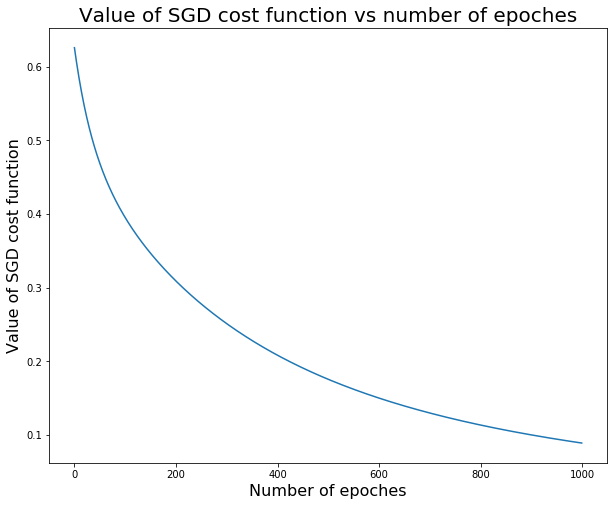

[0.97275096] [0.0625223]
9
Accuracy is : 91.0
[[0.57788545]
 [4.09797773]
 [3.69592299]]


In [9]:
def sigmoid(x):
    '''
    function used to calculate the probabilities of class 
    '''
    return  1/(1 + np.exp(-(x)))

def y_predicted(input_data, theta):
    '''
    This function claculates the probablity of the class 
    '''
    #print(np.dot(input_data, theta))
    return  sigmoid(np.dot(input_data, theta))

def cost_function(theta, x, y, y_dash):
    '''
    This function computes the cost function y_predicted(x, theta)
    '''
    N = len(x)
    cost = -(1/N)*np.sum(y*np.log(y_dash) + (1-y)*np.log(1- y_dash))
    return cost

def gradient(theta, x, y, y_dash):
    '''
    the gradient of the cost function at the point theta
    '''
    N = x.shape[0]
    diff_prob = y_dash - y
    #print("x.shape; ", x.shape)
    delta_grad = (1/N)*(np.dot(diff_prob.T, x))
    #print("````",delta_grad)
    return delta_grad.T

def sgd_optimize(alpha, theta, n_iter, x, y):
    '''
    '''
    epocs = range(n_iter)
    costs = []
    #print("x, y shape:", x.shape, y.shape)
    X = x.copy()
    Y = y.copy()
    N = x.shape[0]
    for i in epocs:
        y_dash = y_predicted(x, theta)
        XY = np.hstack((X,Y))
        #np.random.shuffle(XY)
        x = XY[:, :-1]
        y = XY[:, -1].reshape(len(x), 1)
        #print("x, y shape:", x.shape, y.shape)
        for j in range (0, N):
            y_dash[j] = y_predicted(x[j], theta)
            x_ = x[j].reshape(1, x[j].shape[0])
            y_ = y[j].reshape(y[j].shape[0], -1)
            y_dash_ = y_dash[j].reshape(y_dash[j].shape[0], -1)
            cost = cost_function(theta, x_, y_, y_dash_)
            delta_theta = gradient(theta, x_, y_, y_dash_)
            theta = theta - alpha * delta_theta
        costs.append(cost)
            #new_cost = cost_function(theta, x, y)
            #print("Epoc = "+str(i)+"; Theta = "+str(theta)+"; Cost = "+str(cost))
    return costs, epocs, theta

def accuracy(y, y_dash):
    #print(y_dash)
    print(max(y_dash), min(y_dash))
    y_dash = y_dash > 0.5
    y_dash = y_dash.astype(int)
    diff = abs(y - y_dash)
    predicted = np.sum(diff)
    print(predicted)
    accuracy = (1 - predicted/len(y)) * 100
    print("Accuracy is : "+str(accuracy))

N = data.shape[0]
print(N)
f0 = np.ones((N,1))
f1 = data["feature1"].to_numpy()
#print(type(f1), type(f0))
f1 = f1.reshape(f1.shape[0],-1)
f2 = data["feature2"].to_numpy()
f2 = f2.reshape(f2.shape[0],-1)
print(f1.shape, f2.shape, f0.shape)

#regularize data:
f1 = (f1 - np.mean(f1)) / (np.max(f1) - np.min(f1))
f2 = (f2 - np.mean(f2)) / (np.max(f2) - np.min(f2))

feature = np.hstack((f0, f1, f2))
print (feature.shape)
theta = np.random.random((3,1)) * 0.1
#theta = np.zeros((3,1))
#print(theta)
print(theta.shape)
y = data["class"].to_numpy()
y = y.reshape(y.shape[0], -1)
print (y.shape)

costs, epocs, theta = sgd_optimize(.001, theta, 1000, feature, y)
print("cost.shape: ", len(costs))
print("epocs.shape: ", len(epocs))
t = np.arange(0,100000)
#e = range(epocs*)
fig = plt.figure(figsize=(10,8))
plt.xlabel("Number of epoches",Fontsize=16)
plt.ylabel("Value of SGD cost function", Fontsize=16)
plt.title("Value of SGD cost function vs number of epoches", Fontsize=20)
plt.plot(epocs, costs)
fig.savefig('q4_cost_vs_epoches.jpg')
plt.show()
y_dash = y_predicted(feature, theta)
accu = accuracy(y, y_dash)
print(theta)

100
(100, 1) (100, 1) (100, 1)
         feature1    feature2       class
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


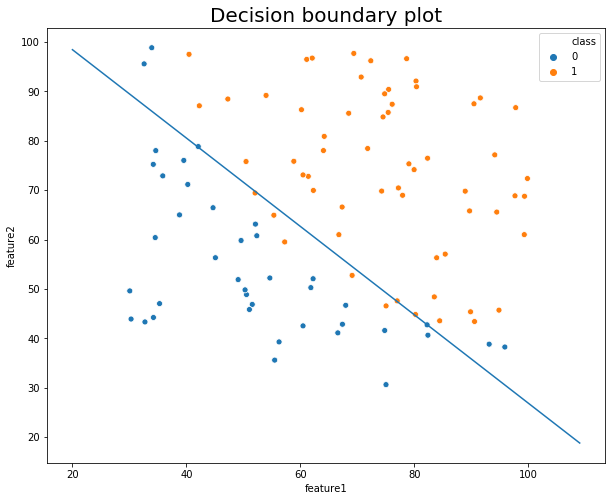

In [5]:
N = data.shape[0]
print(N)
f0 = np.ones((N,1))
f1 = data["feature1"].to_numpy()
#print(type(f1), type(f0))
f1 = f1.reshape(f1.shape[0],-1)
f2 = data["feature2"].to_numpy()
f2 = f2.reshape(f2.shape[0],-1)
print(f1.shape, f2.shape, f0.shape)
fig = plt.figure(figsize=(10,8))

sns.scatterplot(x="feature1",  data= data, y="feature2", hue="class")
print(data.describe())
x_var =  np.arange(20,110)

x_coord = []
for i in x_var:
    x = (i - np.mean(f1)) / (np.max(f1) - np.min(f1))
    x_coord.append(x)

y_var =  -(theta[0] + theta[2]*x_coord)*(1/theta[1])
#f1 = (f1 - np.mean(f1)) / (np.max(f1) - np.min(f1))
#f2 = (f2 - np.mean(f2)) / (np.max(f2) - np.min(f2))

y_coord =[]
for i in y_var:
    y = i*(np.max(f2) - np.min(f2)) + np.mean(f2) 
    y_coord.append(y)

#plt.plot(x_var, y_var)
plt.plot(x_var, y_coord)
plt.title("Decision boundary plot", fontsize=20)
fig.savefig('q4_decision_boundary.jpg')
plt.show()